<a href="https://colab.research.google.com/github/heejvely/Deep_learning/blob/main/%EB%AA%A8%EB%8D%B8_%EC%84%A4%EA%B3%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jan  1 12:53:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 폐암 수술 환자의 생존율 예측하기

In [13]:
# 딥러닝을 구동하는 데 필요한 케라스 함수 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리 불러옴
import numpy as np
import tensorflow as tf
import pandas as pd

# 실행될 때마다 같은 결과를 출력하기 위해 설정하는 부분
np.random.seed(3)
tf.random.set_seed(3)

# 준비된 수술 환자 데이터를 불러옴
Data_set = np.loadtxt('/content/drive/MyDrive/colab/deep_learning_basic/자료/ThoraricSurgery.csv', delimiter=",")

# 환자의 기록과 수술 결과를 x와 y로 구분하여 저장
x = Data_set[:,:17]
y = Data_set[:,17]

# 딥러닝 구조를 결정(모델을 설정하고 실행하는 부분)
model = Sequential()
model.add(Dense(30, input_dim = 17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 딥러닝 실행
model.compile(loss='mean_squared_error', optimizer='adam', metrics='accuracy')
model.fit(x, y, epochs=100, batch_size=10)

Epoch 1/100
47/47 [==============================] - 2s 2ms/step - loss: 0.1485 - accuracy: 0.8426
Epoch 2/100
47/47 [==============================] - 0s 3ms/step - loss: 0.1402 - accuracy: 0.8511
Epoch 3/100
47/47 [==============================] - 0s 3ms/step - loss: 0.1433 - accuracy: 0.8489
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.8511
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1386 - accuracy: 0.8468
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.8511
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1336 - accuracy: 0.8489
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.8511
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.8383
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.8447
Epoch 11/

## 입력층, 은닉층, 출력층

In [ ]:
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

1. Sequential() 함수를 model로 선언해 놓고 model.add() 라는 라인을 추가하면 새로운 층이 만들어짐.
2. 코드에는 model.add()로 시작하는 라인이 두 개가 있으므로 두 개의 층을 가진 모델을 만드는 것
3. 맨 마지막 층은 결과를 출력하는 '출력층'이 됨.
4. 나머지는 모두 '은닉층'의 역할을 함.

#### Dense(30, input_dim=17, activation='relu')
- Dense() 함수를 통해 이 층에 몇개의 노드를 만들 것인지를 숫자로 써줌 -> 30의 노드를 만든 다는 것
- input_dim -> 입력 데이터에서 몇 개의 값을 가져올지를 정하는 것
- keras는 입력층을 따로 만드는 것이 아니라, 첫 번째 은닉층에 input_dim을 적어줌으로써 첫 번째 Dense가 은닉층 + 입력층의 역할을 겸함.
- 은닉층의 각 노드는 17개의 입력 값에서 임의의 가중치를 가지고 각 노드로 전송되어 활성화 함수를 거치고, 결괏값이 출력층으로 전달됨.
-> activation에 원하는 활설화 함수를 적용함.

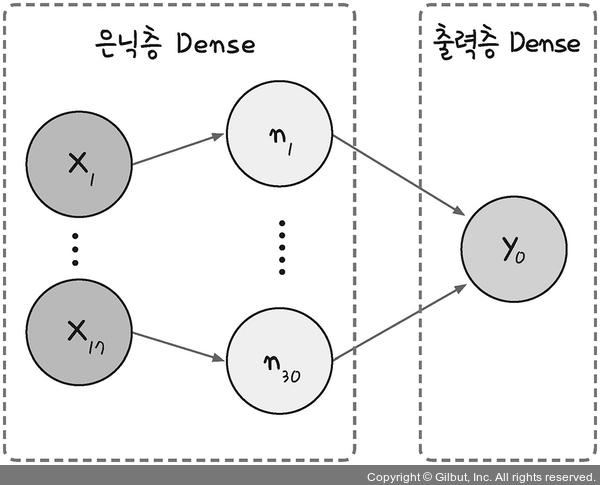

#### Dense(1, activation='sigmoid')
- 출력층, 출력 값을 하나로 정해서 보여줘야 하므로 출력층의 노드 수는 1개
- 노드에서 입력받은 값 역시 활성화 함수를 거쳐 최종 출력 값으로 나와야함.

## 모델 컴파일

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

앞서 지정한 모델이 효과적으로 구현될 수 있게 여러 가지 환결을 설정해 주면서 컴파일하는 부분

#### 오차 함수
- 오차함수는 평균 제곱 오차 함수(mean_squared_error) 사용
- 오차 함수를 바꾸면 더 좋은 효과를 내기도 함. 평균 제곱 오차 계열의 함수 외에도 교차 엔트로피 계열의 함수가 있음.
- 평균 제곱 오차 계열의 함수는 수렴하기까지 속도가 많이 걸린다는 단점이 있음.
- 교차 엔트로피 계열의 함수는 출력 값에 로그를 취해서 오차가 커지면 수렴 속도가 빨라지고, 오차가 작아지면 수렴 속도가 감소하게끔 함.

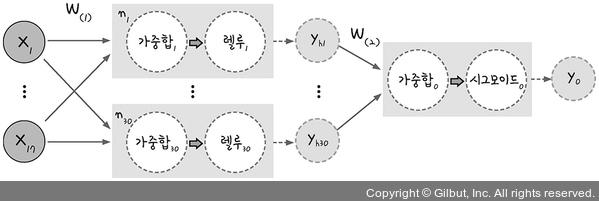

#### metrics()
- 모델 수행 결과를 나타내게끔 설정
- 정확도를 측정하기 위해 사용되는 테스트 샘플을 학습 과정에서 제외시킴으로써 과적합문제(overfitting) 방지하는 기능

## 교차 엔트로피

주로 분류 문제에서 많이 사용

- 특별히 예측 값이 참과 거짓 둘 중 하나인 형식일 때는 binary_crossentropy(이항 교차 엔트로피)

#### 오차 함수 종류

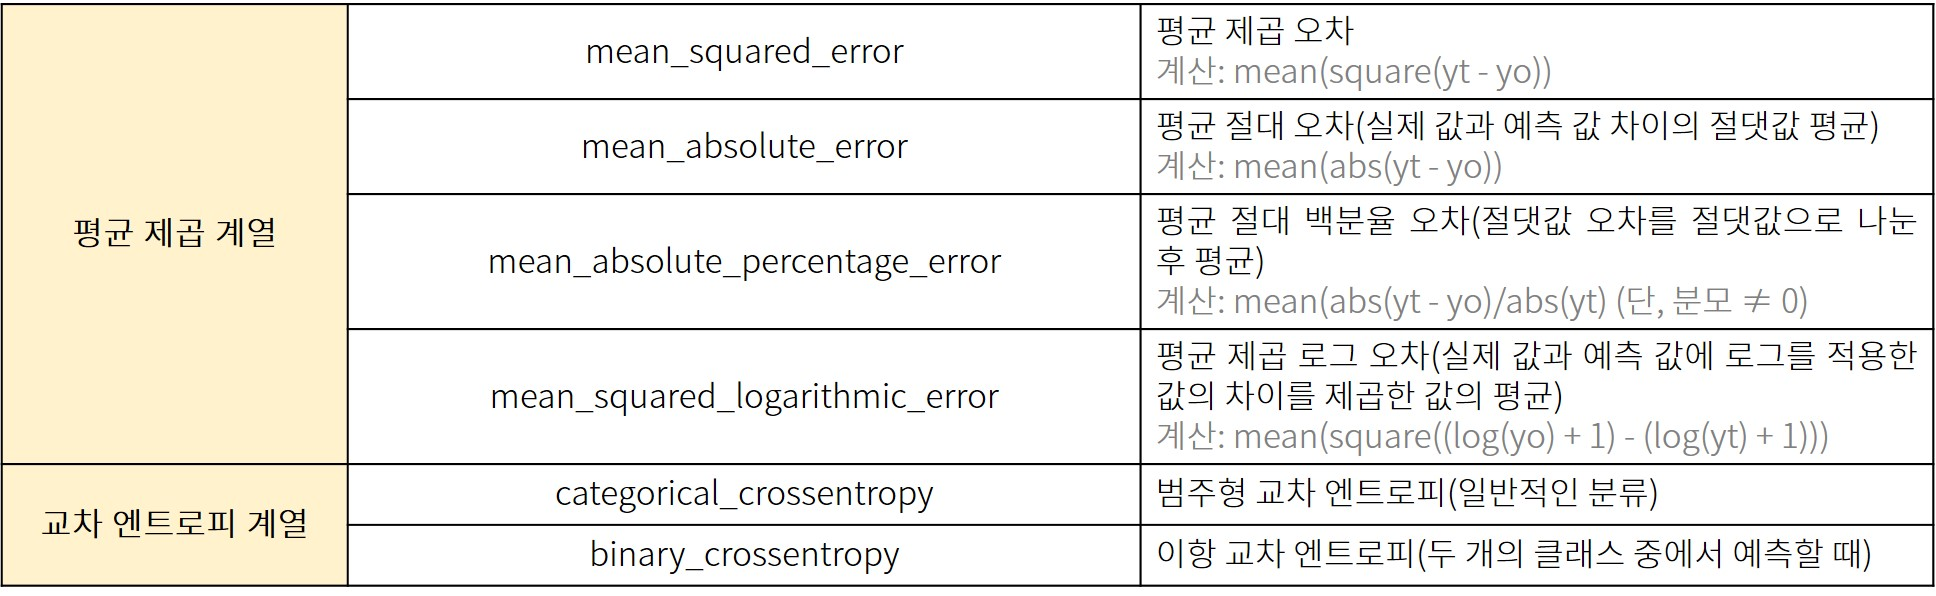

## 모델 실행하기

In [ ]:
model.fit(x, y, epochs=100, batch_size = 10)

- 각 샘플이 처음부터 끝까지 100번 재사용될 때까지 실행을 반복하라는 뜻
- batch_size는 샘플을 한 번에 몇 개씩 처리할지를 정하는 부분으로
- 전체 470개의 샘플을 10개씩 끊어서 집어넣으라는 뜻
- batch_size가 너무 크면 학습 속도가 느려지고, 너무 작으면 각 실행 값의 편차가 생겨서 전체 결괏값이 불안정해질 수 있음.